In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df= pd.read_csv('Titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [44]:
df.shape

(418, 12)

In [52]:
df['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


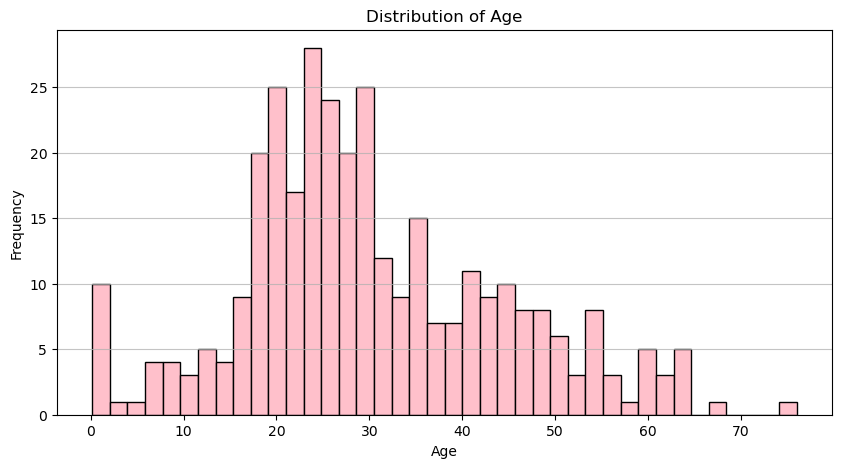

In [72]:
plt.figure(figsize=(10, 5))
plt.hist(df['Age'].dropna(), bins=40, color='pink', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.grid(axis='y', alpha=0.75)
plt.show()

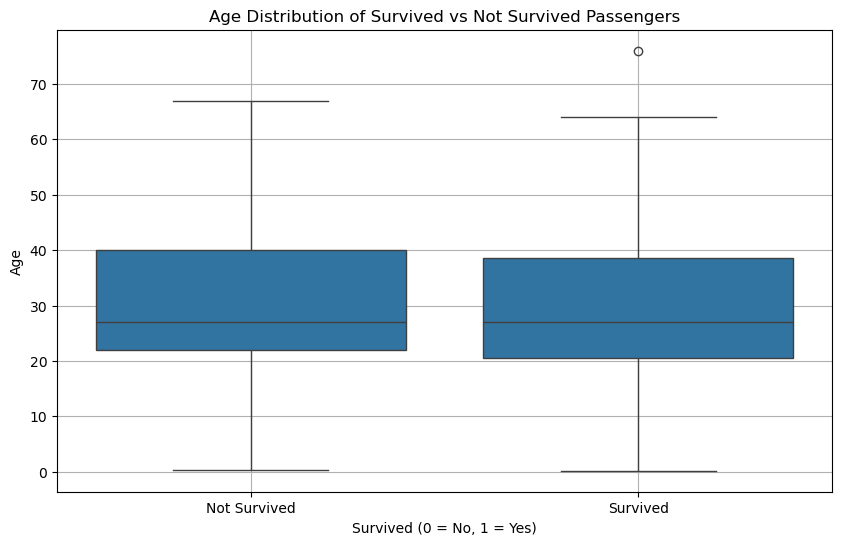

In [60]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=df)

# Set the title and labels
plt.title('Age Distribution of Survived vs Not Survived Passengers')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.xticks([0, 1], ['Not Survived', 'Survived'])  # Custom x-tick labels
plt.grid(True)
plt.show()

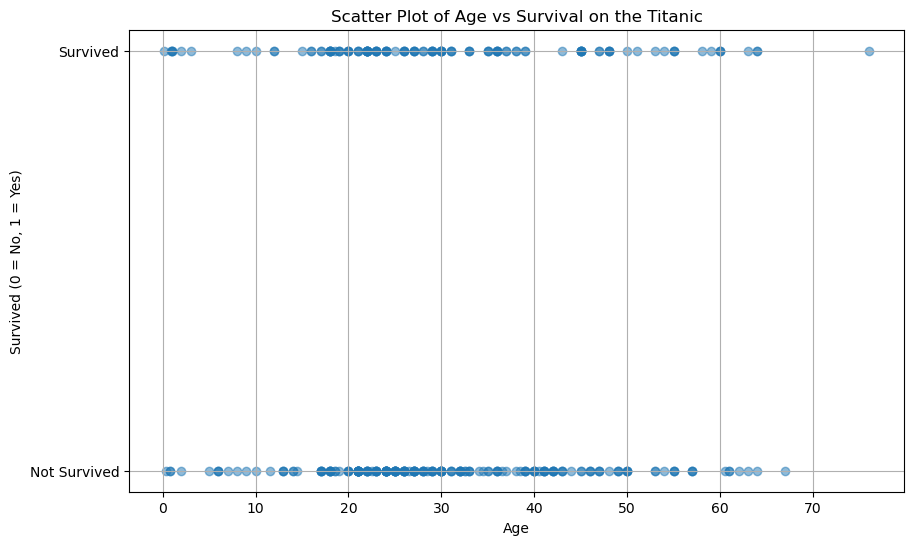

In [64]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Survived'], alpha=0.5)

# Set the title and labels
plt.title('Scatter Plot of Age vs Survival on the Titanic')
plt.xlabel('Age')
plt.ylabel('Survived (0 = No, 1 = Yes)')
plt.yticks([0, 1], ['Not Survived', 'Survived'])  # Custom y-tick labels
plt.grid(True)
plt.show()

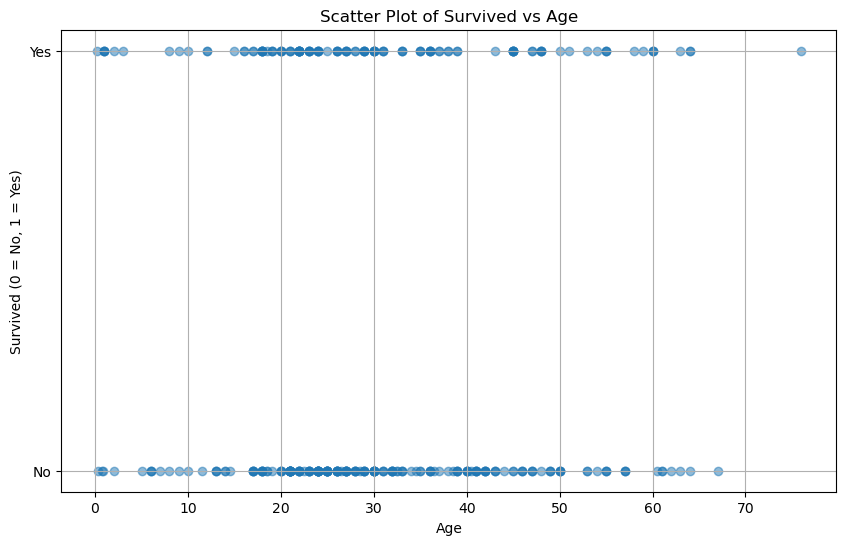

In [68]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Survived'], alpha=0.5)
plt.title('Scatter Plot of Survived vs Age')
plt.xlabel('Age')
plt.ylabel('Survived (0 = No, 1 = Yes)')
plt.yticks([0, 1], ['No', 'Yes'])
plt.grid()
plt.show()

In [12]:
import seaborn as sns


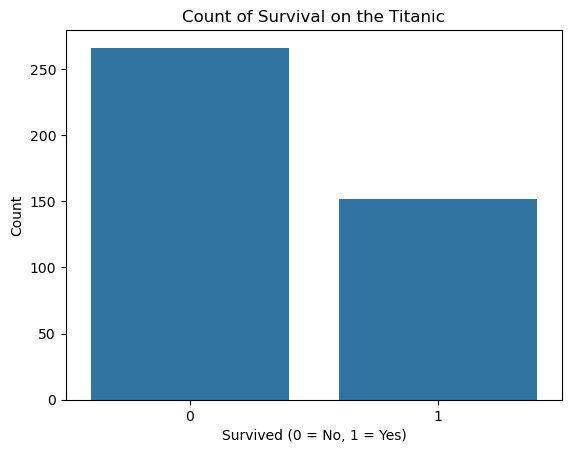

In [16]:
sns.countplot(x='Survived', data=df)
plt.title('Count of Survival on the Titanic')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

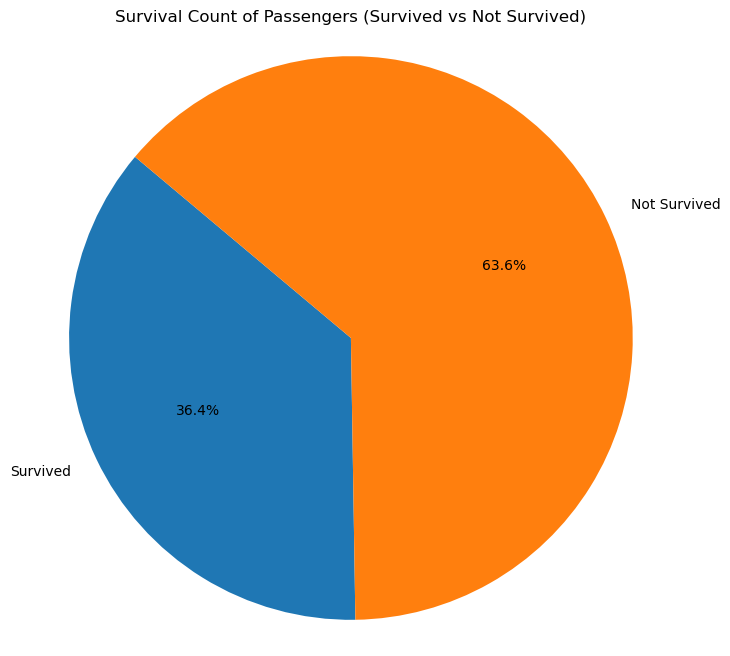

In [40]:
pclass_survival_counts = df.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)

# Prepare data for the pie chart
labels = ['Survived', 'Not Survived']
sizes = [pclass_survival_counts[1].sum(), pclass_survival_counts[0].sum()]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Survival Count of Passengers (Survived vs Not Survived)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

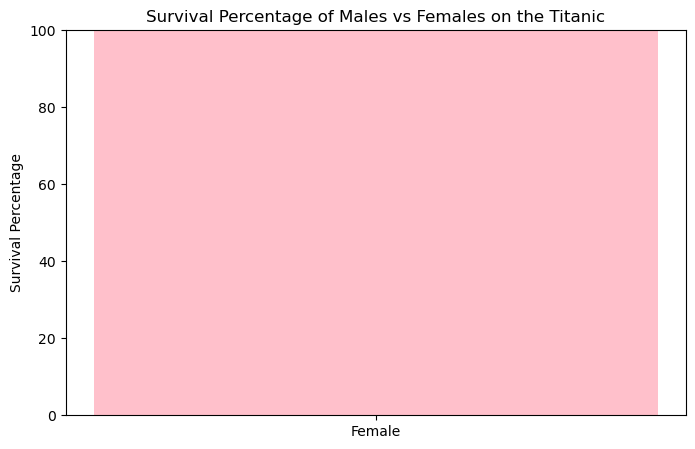

In [28]:
survival_counts = df.groupby('Sex')['Survived'].value_counts().unstack()
survival_percentages = survival_counts.div(survival_counts.sum(axis=1), axis=0) * 100

# Prepare data for the bar chart
male_survival_percentage = survival_percentages.loc['male', 1] if 'male' in survival_percentages.index else 0
female_survival_percentage = survival_percentages.loc['female', 1] if 'female' in survival_percentages.index else 0

# Create a bar chart
labels = ['Male', 'Female']
percentages = [male_survival_percentage, female_survival_percentage]

plt.figure(figsize=(8, 5))
plt.bar(labels, percentages, color=['blue', 'pink'])
plt.title('Survival Percentage of Males vs Females on the Titanic')
plt.ylabel('Survival Percentage')
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100
plt.show()

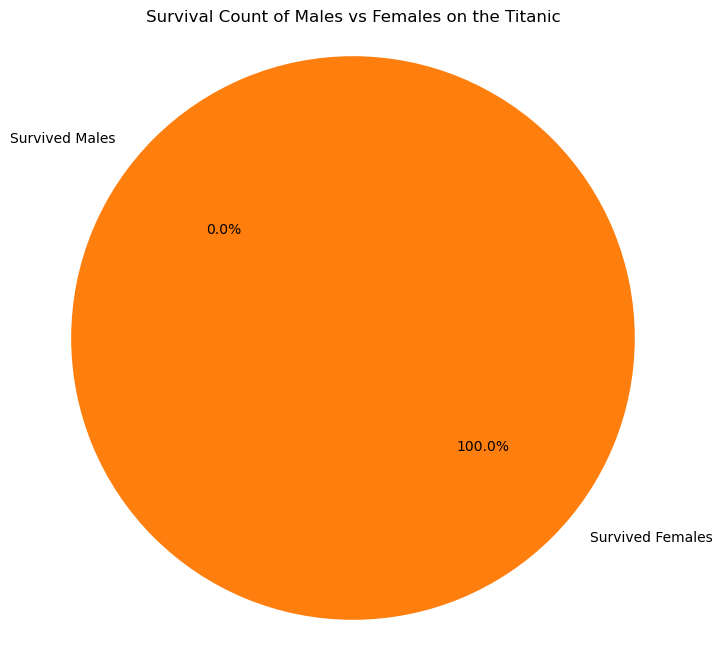

In [36]:
survived_counts = df[df['Survived'] == 1].groupby('Sex').size()

# Prepare data for the pie chart
labels = ['Survived Males', 'Survived Females']
sizes = [survived_counts.get('male', 0), survived_counts.get('female', 0)]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Survival Count of Males vs Females on the Titanic')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

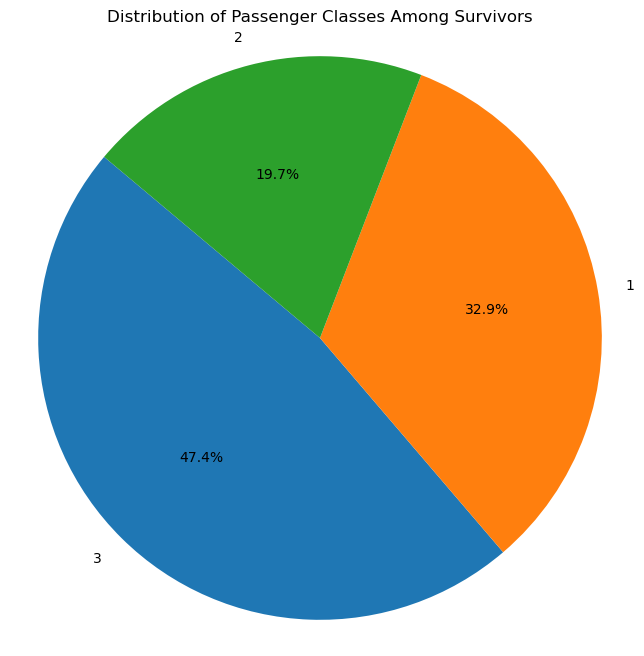

In [56]:
survived_passengers = df[df['Survived'] == 1]

# Count the number of survivors in each Pclass
pclass_survivor_counts = survived_passengers['Pclass'].value_counts()

# Prepare data for the pie chart
labels = pclass_survivor_counts.index.astype(str)  # Convert Pclass to string for labels
sizes = pclass_survivor_counts.values

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Passenger Classes Among Survivors')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

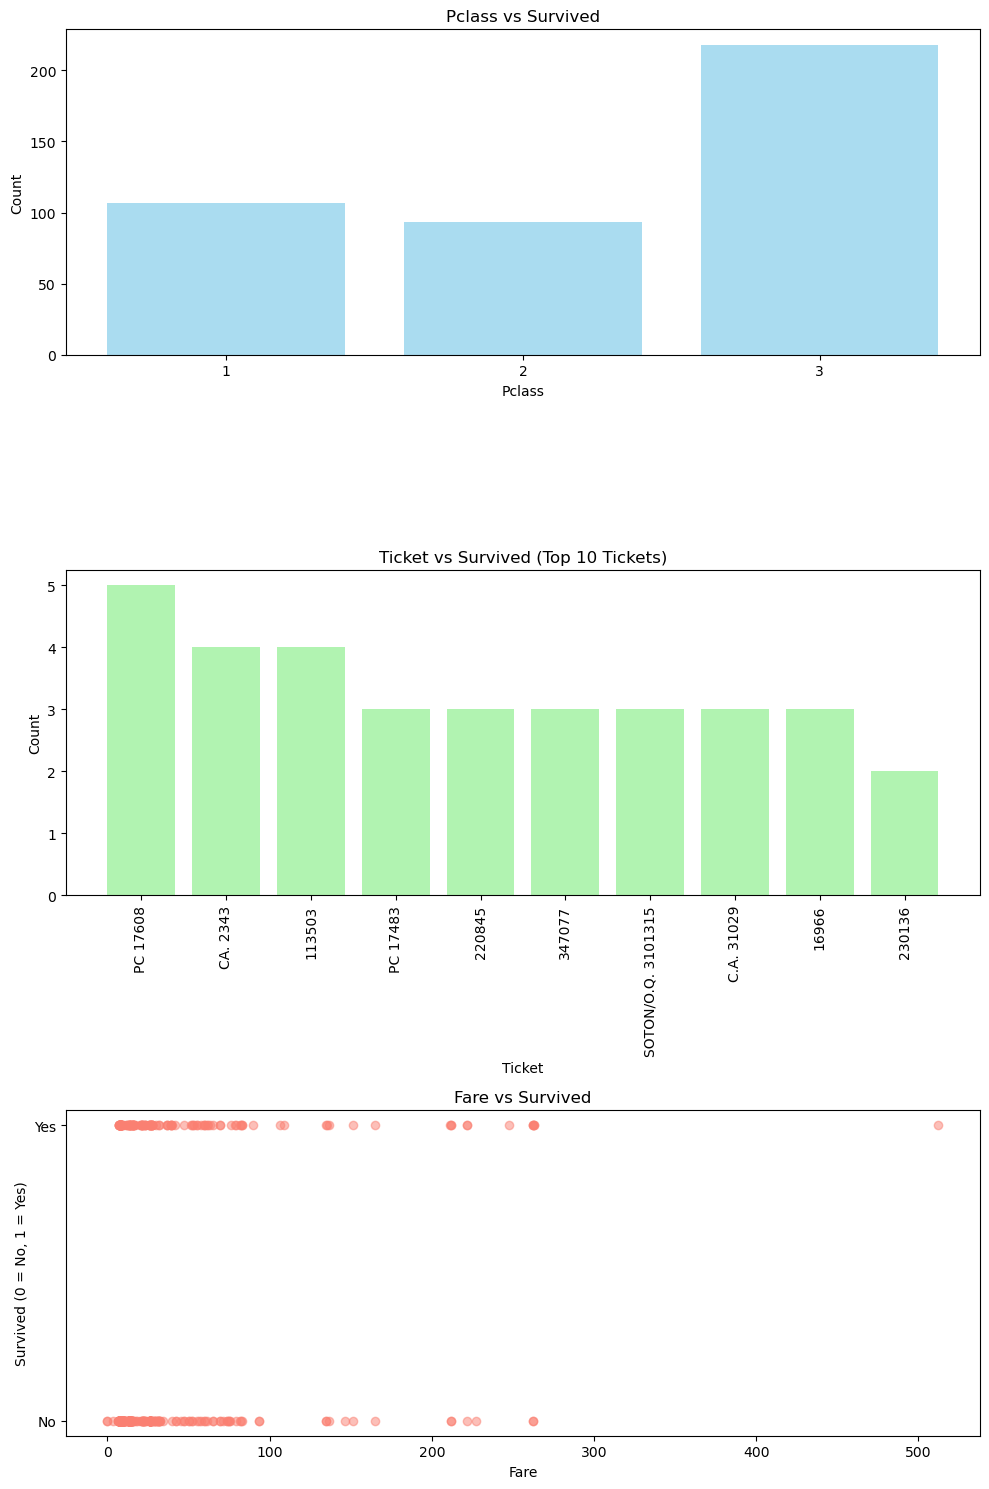

In [82]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
# Pclass vs Survived
axs[0].bar(df['Pclass'].value_counts().index, df['Pclass'].value_counts(), color='skyblue', alpha=0.7)
axs[0].set_title('Pclass vs Survived')
axs[0].set_xlabel('Pclass')
axs[0].set_ylabel('Count')
axs[0].set_xticks(df['Pclass'].value_counts().index) 
axs[0].set_xticklabels(df['Pclass'].value_counts().index)  

# Ticket vs Survived (using count of unique tickets)
ticket_counts = df['Ticket'].value_counts()
top_tickets = ticket_counts.index[:10]
top_ticket_counts = ticket_counts.values[:10]

axs[1].bar(top_tickets, top_ticket_counts, color='lightgreen', alpha=0.7)  # Show top 10 tickets
axs[1].set_title('Ticket vs Survived (Top 10 Tickets)')
axs[1].set_xlabel('Ticket')
axs[1].set_ylabel('Count')
axs[1].tick_params(axis='x', rotation=90)

# Fare vs Survived
axs[2].scatter(df['Fare'], df['Survived'], alpha=0.5, color='salmon')
axs[2].set_title('Fare vs Survived')
axs[2].set_xlabel('Fare')
axs[2].set_ylabel('Survived (0 = No, 1 = Yes)')
axs[2].set_yticks([0, 1])
axs[2].set_yticklabels(['No', 'Yes'])

plt.tight_layout()
plt.show()